In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("database.csv")

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
df.isnull().sum()/df.shape[0]*100

,0
Date,0.000000
Time,0.000000
Latitude,0.000000
Longitude,0.000000
Type,0.000000
Depth,0.000000
Depth Error,80.945669
Depth Seismic Stations,69.686486
Magnitude,0.000000
Magnitude Type,0.012814


In [7]:
df=df[['Date', 'Latitude', 'Longitude', 'Depth','Magnitude']]
df

,Date,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,19.2460,145.6160,131.60,6.0
1,01/04/1965,1.8630,127.3520,80.00,5.8
2,01/05/1965,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,36.9179,140.4262,10.00,5.9
23410,12/29/2016,-9.0283,118.6639,79.00,6.3


In [ ]:

epoch = datetime(1970, 1, 1)


def mapdateTotime(x):
    try:
        dt = datetime.strptime(x, "%m/%d/%Y")
    except ValueError:
        dt = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
    diff = dt - epoch
    return diff.total_seconds()


df['Date'] = df['Date'].apply(mapdateTotime)

<Axes: >

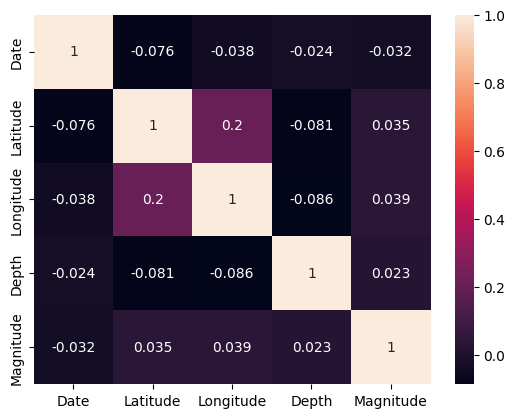

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
X=df[['Date', 'Latitude', 'Longitude', 'Depth']]
Y=df['Magnitude']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
X_train.shape

(18729, 4)

In [14]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [15]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 14.1845 - mae: 3.1282 - val_loss: 1.0478 - val_mae: 0.8067
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7021 - mae: 0.6425 - val_loss: 0.2023 - val_mae: 0.3353
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1901 - mae: 0.3254 - val_loss: 0.1893 - val_mae: 0.3109
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1761 - mae: 0.3127 - val_loss: 0.1869 - val_mae: 0.3087
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1752 - mae: 0.3108 - val_loss: 0.1846 - val_mae: 0.3179
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1743 - mae: 0.3099 - val_loss: 0.1840 - val_mae: 0.3176
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1763 - mae: 0.3120 - val_loss: 0.1839 - val_mae: 0.3145
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1780 - mae: 0.3140 - val_loss: 0.1920 - val_mae: 0.3472
Epoch 9/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
pred=model.predict(X_test)
pred

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[5.677792 ],
       [5.867381 ],
       [5.8736153],
       ...,
       [5.9741154],
       [5.906465 ],
       [5.8328433]], dtype=float32)

In [18]:
mean_squared_error(y_test,pred),mean_absolute_error(y_test,pred),r2_score(y_test,pred)

(0.18184611050983224, 0.3122042300541789, 0.014099710251236353)

In [ ]:

lat = float(input("Enter Latitude between -77 to 86: "))
long = float(input("Enter Longitude between -180 to 180: "))
depth = float(input("Enter Depth between 0 to 700: "))
date = input("Enter the date (MM/DD/YYYY format): ")

InputX2 = np.array([[mapdateTotime(date), lat, long, depth]], dtype=np.float32)
InputX2_norm = s.transform(InputX2)
print(model.predict(InputX2_norm))

Enter Latitude between -77 to 86: 11
Enter Longitude between -180 to 180: 22
Enter Depth between 0 to 700: 30
Enter the date (MM/DD/YYYY format): 11/11/2001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[5.847734]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [20]:
model.save('my_model.keras')

In [21]:
load_model=tf.keras.models.load_model('my_model.keras')

In [22]:
load_model.predict(InputX2_norm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[5.847734]], dtype=float32)